Исследовать средний удельный доход в единицу времени $\rho$ в системе массового

обслуживания $М|М|5|\infty$, где интенсивность входящего потока $\lambda=8$ $час^{-1}$,

 интенсивность обслуживания на одном приборе $\mu=2$ $час^{-1}$,
 
  доход от обслуживания одной заявки составляет $с_1=6$ у.е.,

   плата в единицу времени за простой одного прибора $с_2=1$ у.е./час,

   плата в единицу времени ожидания заявки в очереди равна $с_3=3$ у.е./час.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

In [0]:
LAM = 8
MU = 2
C = [6, -1, -3]
T = 1000
n = 5

### Функция моделирования траектории

In [0]:
def trace():
    hist = [0]
    I = []
    TT = [0]
    i = 0 # начальное состояние системы
    h = np.random.exponential(1 / LAM)
    t = h
    t1 = h # время, через которое придет требование
    t2 = 0 # время, через которое уйдет требование
    while t < T:
        hist.append((max(n - i, 0) * C[1] +\
                     min(i, n) * C[0] * MU + max(i - n, 0) * C[2]) * h)
        I.append(i)
        TT.append(t)
        i += (t1 == h) - (t2 == h)

        t1 = np.random.exponential(1 / LAM)
        if i == 0:
            h = t1
            t2 = 0
        else:
            t2 = np.random.exponential(1 / (min(i, n) * MU))
            h = min(t1, t2)
        t += h

    return np.sum(hist) / (t - h), I, TT 

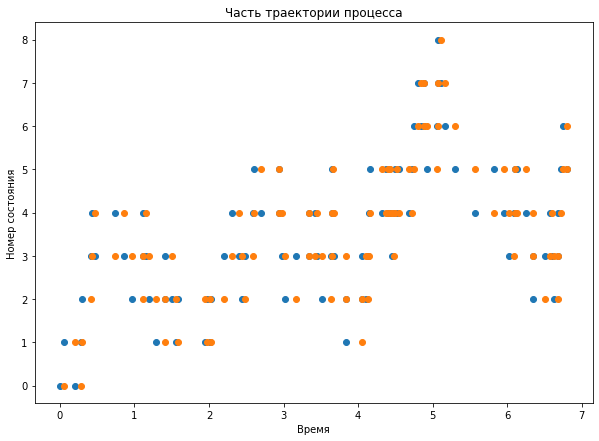

In [0]:
plt.figure(figsize=(10, 7))
tr = trace()
plt.scatter(tr[2][:100], tr[1][:100])
plt.scatter(tr[2][1:101], tr[1][:100])
#plt.plot(tr[2][:100], tr[1][:100])
plt.title('Часть траектории процесса')
plt.xlabel('Время')
plt.ylabel('Номер состояния')
plt.show()

### Моделирование 1000 реализаций траектории

In [0]:
s = []
for i in tqdm_notebook(range(3)):
    s.append(trace()[0])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [0]:
s

[40.6212485270357, 40.23174689996092, 41.093743930536476]

### Средний удельный доход в единицу времени

Результат компьютерного моделирования ~ совпадает с аналитическим решением - $40.35$.

In [0]:
np.mean(s)

40.34046986204199

In [0]:
%%time
_ = trace()

CPU times: user 127 ms, sys: 1.91 ms, total: 128 ms
Wall time: 131 ms


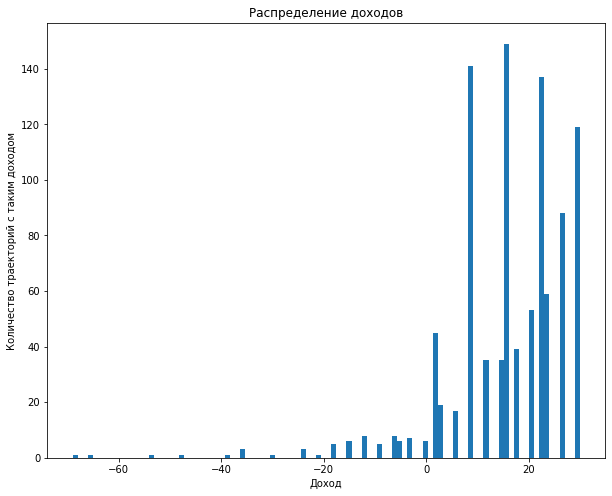

In [0]:
plt.figure(figsize=(10, 8))
plt.hist(s, bins=100)
plt.title('Распределение доходов')
plt.xlabel('Доход')
plt.ylabel('Количество траекторий с таким доходом')
plt.show()

In [0]:
for u in np.unique(s):
    print(u, sum(s == u) / 1000)

-69 0.001
-66 0.001
-54 0.001
-48 0.001
-39 0.001
-36 0.003
-30 0.001
-24 0.003
-21 0.001
-18 0.005
-15 0.006
-12 0.008
-9 0.005
-6 0.008
-5 0.006
-3 0.007
0 0.006
2 0.045
3 0.019
6 0.017
9 0.141
12 0.035
15 0.035
16 0.149
18 0.039
21 0.053
23 0.137
24 0.059
27 0.088
30 0.119
